In [11]:
#Importar librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg

In [12]:
#Cargar base de datos

df_catalogo = pd.read_csv('catalogo_sismos.csv')

In [13]:
#FIltrar las columnas a utlizar

df_punto2 = df_catalogo[['coordenadaX','coordenadaY','DEPTH']]

In [14]:
#Eliminar valores nulos

nan_value = float("NaN")
df_punto2.replace("", nan_value, inplace=True)
df_punto2.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
#Cálculo del centroide

z=df_punto2['DEPTH']*-1000
y=df_punto2['coordenadaY']
x=df_punto2['coordenadaX']

z_prom=np.mean(z)
x_prom=np.mean(x)
y_prom=np.mean(y)

puntocentral=np.vstack((x_prom, y_prom, z_prom))
puntocentral

array([[1109496.14333474],
       [1245631.26053738],
       [-147735.21796565]])

In [16]:
# Cálculo de N, Cr y la distancia al centroide

dist=np.sqrt(((x-x_prom)**2)+((y-y_prom)**2)+((z-z_prom)**2))
N=len(df_punto2)

def Nvalues(dist, r):
    Nv=np.count_nonzero(dist < r)
    Nv=np.mean(Nv)
    return Nv

def cr(Nr,N):
    cr=(2*Nr)/(N*(N-1))
    return cr

amin = np.ceil(np.min(dist))
amax = np.ceil(np.max(dist))

r=np.linspace(amin, amax, N)
c=np.zeros(len(r))
Nr=np.zeros(len(r))

for i in range (len(r)):
    Nr[i] = Nvalues(dist, r[i])
    
for i in range (len(r)):
    c[i]=cr(Nr[i],N)

In [17]:
#Definición de las variables r y c

df_punto2['r']=r 
df_punto2['c']=c 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
#Definir límite de la regresión

Limite=7000
valo_1= df_punto2['r'] < Limite
x=np.log10(df_punto2['r'][valo_1]) 
y=np.log10(df_punto2['c'][valo_1])

def predlog(x0, x):
    return 10**(x0[0] + (x0[1]*np.log10(x)))

In [19]:
#Realizar regresión por la norma L1

from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(x,y)
r2_value=r_value*r_value
lreg=np.vstack((intercept, slope, r2_value))
lreg

array([[-14.87199489],
       [  2.94336859],
       [  0.99165399]])

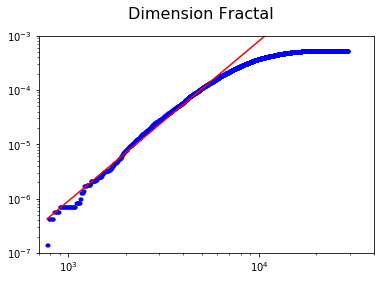

In [20]:
#Gráfica de la dimensión fractal

fig2 = plt.figure()
ax = plt.gca()

fig2.suptitle("Dimension Fractal", fontsize=16)
ax.scatter(r, c, marker=".", color="blue")
ax.plot(r, predlog(lreg, r), color="red")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-7, 1e-3)
ax.set_xlim(7e2, 4e4)

fig2.savefig('Dimension_fractal.png', dpi=400)